<h1>Linear Regression:</h1>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

<p>1. Generate 2000 data points with one dimensional feature randomly sampled. For each data point attribute a real number representing its target value.</p>


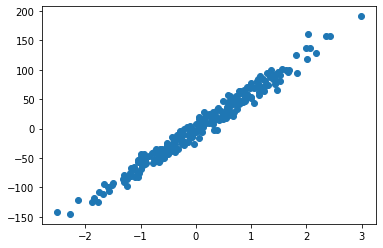

In [20]:
n_samples = 250
X = np.random.rand(n_samples)
Y = np.random.rand(n_samples)
X , Y = datasets.make_regression(n_samples,1,noise=10)
Y = Y.reshape(n_samples,1)
plt.scatter(X,Y)

<p>2. Fit a line using the data points and their target values using two different methods</p>


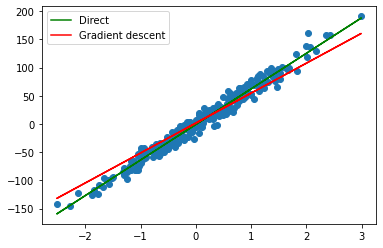

In [53]:
# Method 1 : Linear Regression exacte

"""m, b = np.polyfit(X, y, 1)
plt.scatter(X,y)
plt.plot(X, m*X + b,color="red")"""

def method_1(X,Y):
  #Build X matrix 
  new_X = np.array(np.zeros((len(X),2)))
  new_X[:,0] = np.ones(len(X))
  new_X[:,1] = X[:,0]

  XtX = np.dot(np.transpose(new_X),new_X)

  #Calculate coef
  a = np.dot(np.dot(Y.transpose(),new_X),np.linalg.inv(XtX))
  ye = np.dot(a,new_X.transpose())

  return ye.transpose()

plt.plot(X,method_1(X,Y),color='green', label='Direct')

# Method 2 : Gradient descent

def method_2(X,Y,lr=0.001,epochs=1000):
  a = 0
  b = 0

  lr = 0.001  # The learning Rate
  epochs = 1000  # The number of iterations to perform gradient descent

  n = float(len(X)) # Number of elements in X

  # Performing Gradient Descent 
  for i in range(epochs): 
      Y_pred = a*X + b  
      D_a = (-2/n) * sum(X * (Y - Y_pred))  
      D_b = (-2/n) * sum(Y - Y_pred) 
      a = a - lr * D_a  
      b = b - lr * D_b  

  # Making predictions
  Y_pred = a*X + b

  return Y_pred

plt.plot(X, method_2(X,Y), color='red', label='Gradient descent') 
plt.scatter(X, Y)
plt.legend(loc="upper left")
plt.show()


<p>3. Add 20 outlier data points randomly distributed, set them and their target values far away from the original data point</p>


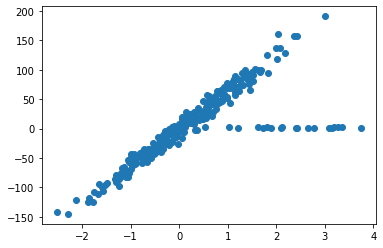

In [54]:
n_outliers = 20
noise_ratio = 2

new_data_X = np.random.rand(n_outliers)*noise_ratio
new_data_Y = np.random.rand(n_outliers)*noise_ratio

new_X = np.ones((n_samples+n_outliers,1))
new_X[:len(X)] = X
new_X[len(X):] = new_data_X.reshape(n_outliers,1)*noise_ratio
new_Y = np.ones((n_samples+n_outliers,1))
new_Y[:len(Y)] = Y
new_Y[len(Y):] = new_data_Y.reshape((n_outliers,1))*noise_ratio
plt.scatter(new_X,new_Y)


<p>4. Fit a line using all data points using one of the proposed two methods. What do you observe?</p>


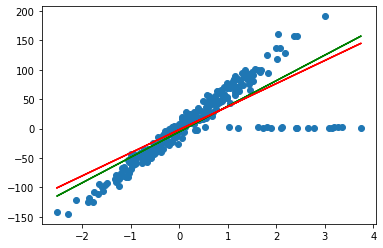

In [55]:
plt.plot(new_X,method_1(new_X,new_Y),color='green', label='Direct')
plt.plot(new_X,method_2(new_X,new_Y),color='red', label='Gradient Descent')
plt.legend(loc="upper left")
plt.scatter(new_X,new_Y)
plt.show()

**Observation**

We can see that adding outliers has made the slop shift too much, that it is now missing a lot of points compared to the previous case.

<br>

<p>5. Add a regularisation to the proposed method, use the sum of the square of coefficients. What do you observe?</p>


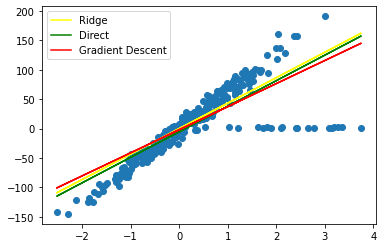

In [63]:
from sklearn.linear_model import Ridge
method_3 = Ridge().fit(new_X,new_Y)
plt.plot(new_X,method_3.coef_*new_X,color='yellow',label='Ridge')
plt.plot(new_X,method_1(new_X,new_Y),color='green', label='Direct')
plt.plot(new_X,method_2(new_X,new_Y),color='red', label='Gradient Descent')
plt.legend(loc="upper left")
plt.scatter(new_X,new_Y)
plt.show()

**Observation**

We can see that the regularized method has a better classification slop than the two previous methods, but maybe we need more tuning to be sure.

<br>

<p>6. Fit linear model with RANSAC algorithm</p>

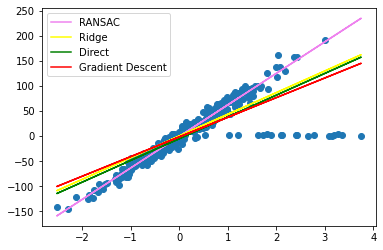

In [70]:
from sklearn.linear_model import RANSACRegressor

method_4 = RANSACRegressor()
method_4.fit(new_X,new_Y)
new_Y_pred = method_4.predict(new_X)

plt.plot(new_X,new_Y_pred,color='violet',label='RANSAC')
plt.plot(new_X,method_3.coef_*new_X,color='yellow',label='Ridge')
plt.plot(new_X,method_1(new_X,new_Y),color='green', label='Direct')
plt.plot(new_X,method_2(new_X,new_Y),color='red', label='Gradient Descent')
plt.legend(loc="upper left")
plt.scatter(new_X,new_Y)
plt.show()

**Observation**

We can see that the RANSAC method is by far the best method among the 4 tested methods.

<br>

<h1>Linear classification</h1>
<p>1. Create an instance of Logistic Regression Classifier and fit the data.</P>


In [116]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

model = LogisticRegression()
logreg.fit(X, Y)

<p>2. Plot the decision boundary </P>

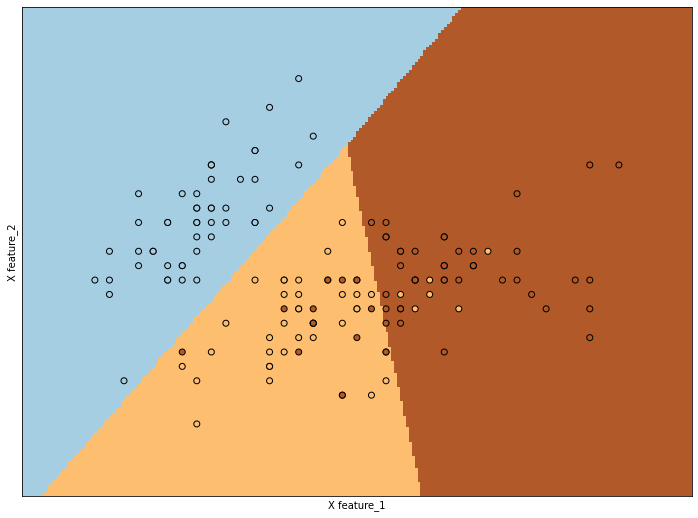

In [119]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('X feature_1')
plt.ylabel('X feature_2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()